# Welcome 
Press \<space bar\> to move to next slide

Press \<shift> \<space bar\> to move to previous slide

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

#from ipywidgets import interact,Dropdown,Checkbox
#from IPython.display import display, clear_output,Latex, Markdown
from IPython.display import clear_output
import pandas as pd
from tqdm.auto import tqdm 

#from modelinvert import targets_instruments
from modelclass import model
model.widescreen()
model.scroll_off()
from inject import inject # monkey patch special methods and properties 

model.modelflow_auto()

# The impact of increasing carbon tax
Simulate the model for different levels of carbon tax

Wait until all experiments are finished

Then press \<space bar\> to move on 

In [4]:
# select if the model is simulated for all experiments or the experiments are loaded 
solve_experiments = False 

# Make experiments 
if solve_experiments:
    if not 'masia' in locals():
        print('Load model')
        masia,baseline = model.modelload('Asia_sep7.pcim',run=1,silent=1,progressbar=1)
        inject(masia)    
    masia.keep_solutions={}
    keep_var = '*_CO2 *_yer *_hic *_head??'
    thisdf = baseline.copy()
    masia(thisdf,keep = f'Business as usual',keep_variables=keep_var,progressbar=0)
    rate_var =  [f'{country}_GCARBR_A' for country in masia.countries_GCARBR_A]
    experiments = list(range(50,360,50))[:]
    bars = '{desc}: {percentage:3.0f}%|{bar}|Experiment {n_fmt}/{total_fmt}'
    with tqdm(total=len(experiments),desc='Simulating different taxrates',bar_format=bars) as pbar:
        for rate in experiments:
            thisdf = baseline.copy()
            thisdf.loc[2022,rate_var] = thisdf.loc[2021,rate_var] + rate
            masia(thisdf,keep = f'{rate}',keep_variables=keep_var,progressbar=1)
            pbar.update()
    clear_output()
    masia.modeldump('co2impact.pcim',keep=1)
else: 
    print('Load model and saved solutions ')
    masia,baseline = model.modelload('co2impact.pcim',run=0)
    masia.basedf=baseline 
    masia.lastdf=baseline 
    inject(masia)    

print('Finished ')

Load model and saved solutions 
Finished 


In [5]:
co2_input_var = [var for var in masia.totgraph.predecessors('WLD_CO2') if var.endswith('CO2')]
co2_input_var_asean = [var for var in masia.totgraph.predecessors('WLD_CO2') if var.endswith('CO2') and  var.split('_')[0] in masia.countries_ASEAN ]

In [6]:
co2_baseline = baseline.loc[:,co2_input_var].pipe(lambda df:df.rename(columns={c : masia.iso_dict.get(cname := c.split('_')[0],cname) for c in df.columns}))
co2_baseline_asean = baseline.loc[:,co2_input_var_asean].pipe(lambda df:df.rename(columns={c : masia.iso_dict.get(cname := c.split('_')[0],cname) for c in df.columns}))

# The emision in the different scenarios

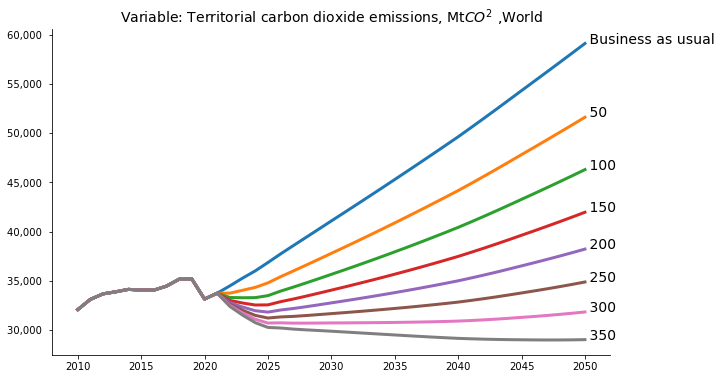

In [7]:
with masia.set_smpl(2010,2050):
    masia.keep_plot('wld_co2',legend=0)['WLD_CO2']

In [8]:
endvalues_ser = pd.Series({rate:df.loc[2050,'WLD_CO2'] for rate,df in masia.keep_solutions.items()})
endvalues = pd.DataFrame(endvalues_ser,columns = ['Global $CO^2$ emission']
                        ).rename(index={'Business as usual':'Business as u.'})

# What happens to the global emision in 2050 

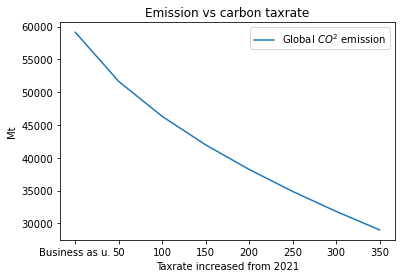

In [9]:
endvalues.plot(xlabel = 'Taxrate increased from 2021',ylabel = 'Mt',title='Emission vs carbon taxrate');


# The marginal impact of the 50 extra tax in each experiment 

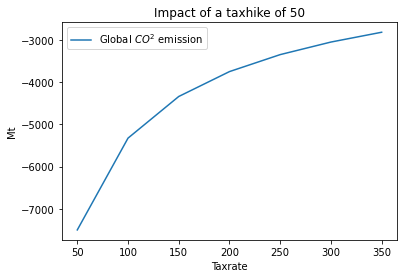

In [10]:
endvalues.diff().plot(xlabel = 'Taxrate',ylabel = 'Mt',title='Impact of a taxhike of 50');

# Impact on different variables

In [27]:
with masia.set_smpl(2010,2050):
    masia.keep_viz(pat='WLD_CO2',use_descriptions=True ,legend=0);

Output()